# Homework 5 - Deep learning and ensemble methods

## Task 1: Deep learning (3 points)

<font color='grey'>*Note that this task partly overlaps with a task used in the Artificial Neural Networks course. However, repetition is the mother of all learning.* :-)</font>

The goal of this task is to get to know the possibilities in Python for training neural networks. We will try out a popular deep learning framework: [Keras](https://keras.io/). Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. Keras has very well designed API, which allows for concise code and flexibility at the same time.

We will do this based on an image dataset [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html). The CIFAR-10 dataset consists of 60 000 photos divided into 10 classes (hence the name CIFAR-10). Classes include common objects such as airplanes, automobiles, birds, cats and so on. Our goal is to train a neural network to classify these images.

The following instructions help to install required dependencies and load the data.

### Installation

#### Linux

To install Keras enter following on Conda command-line:
```
conda install keras
```

By default Keras uses Tensorflow backend. If you happen to have recent NVidia GPU on your machine, you might want to install GPU version of Tensorflow:
```
conda install tensorflow-gpu
```
When you import Keras in your code, you should see "Using TensorFlow backend." notice.

PS. If you have non-NVidia GPU, you might want to give a shot to [PlaidML](http://vertex.ai/blog/announcing-plaidml) Keras backend.

#### Windows

To install Keras enter following on Conda command-line:
```
pip install keras
```
By default Keras uses Tensorflow backend. If you happen to have recent NVidia GPU on your machine, you might want to install GPU version of Tensorflow:
```
pip install tensorflow-gpu
```
When you import Keras in your code, you should see "Using TensorFlow backend." notice.

In [4]:
import numpy as np
import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# loading in the cifar10 dataset
from keras.datasets import cifar10

# Keras comes with built-in loaders for common datasets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# shorten dataset for quicker training
X_train = X_train[:25000]
y_train = y_train[:25000]

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (25000, 32, 32, 3)
Train labels shape:  (25000, 1)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000, 1)


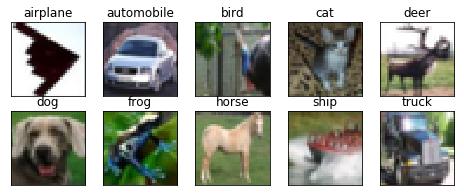

In [6]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
num_classes = len(np.unique(y_train))
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = X_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num,::]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

Building an effective neural network model requires careful consideration of the network architecture as well as the input data format.

First, let's get to know our data.

- **(a)** What do the 4 dimensions ((50000, 32, 32, 3)) of X_train represent? What values do these data contain and from what range do these values come from?

**<font color='purple'>Answer to (a):</font>** First dimension 50000 represents the number of samples in X_train, second and third 32, 32 represent the height and width. The fourth dimension represents the pixel.
These data contains the 32*32 images and these values come from 0 to 255 range.

- **(b)** The following code normalizes the training and testing data. Explain shortly why is data normalization important for training neural networks.

In [7]:
mu = X_train.mean(axis=(0,1,2))
std = X_train.std(axis=(0,1,2))
X_train_norm = (X_train - mu)/std
X_test_norm = (X_test - mu)/std

**<font color='purple'>Answer to (b):</font>** Data normalization is important for training neural networks because each input parameter has a similar data distribution. It makes quick convergence at the time of training the network.

Now we are ready to define our model. We will be using a Convolutional Neural Network (CNN) for this purpose. First we need to define the sequence of dependencies, the computational graph.

We define the following arcitecture:

1. 3x3 convolution with 32 filters, stride 1, padding same
2. batch normalization
3. relu
4. 3x3 convolution with 32 filters, stride 1, padding valid
5. batch normalization
6. relu
7. max pooling 2x2
8. dropout 0.25
7. flatten
8. dense 100
5. batch normalization
6. relu
8. dropout 0.5
8. dense 10
9. softmax

You can consult Keras documentation for layer parameters:
 - [Convolutional layers](https://keras.io/layers/convolutional/)
 - [Pooling layers](https://keras.io/layers/pooling/)
 - [Normalization layers](https://keras.io/layers/normalization/)

In [8]:
from keras.layers import Input, Conv2D, Activation, Flatten, Dense, MaxPooling2D, BatchNormalization, Dropout

x = Input(shape=(32, 32, 3))
c1 = Conv2D(32, (3, 3), strides=(1, 1), padding="same")(x)
b1 = BatchNormalization()(c1)
a1 = Activation('relu')(b1)
c2 = Conv2D(32, (3, 3), strides=(1, 1), padding="valid")(a1)
b2 = BatchNormalization()(c2)
a2 = Activation('relu')(b2)
p2 = MaxPooling2D(pool_size=2)(a2)
d2 = Dropout(rate=0.25)(p2)
f2 = Flatten()(d2)
h3 = Dense(100)(f2)
b3 = BatchNormalization()(h3)
a3 = Activation('relu')(b3)
d3 = Dropout(rate=0.5)(a3)
z = Dense(10)(d3)
p = Activation('softmax')(z)

- **(c)** Describe shortly what are Conv2D, BatchNormalization, Dropout and Dense? 

**<font color='purple'>Answer to (c):</font>**

Conv2D: This layer creates a convolution kernel that is convolved with the layer input over a single spatial (or temporal) dimension to produce a tensor of outputs.
Reference: https://keras.io/layers/convolutional/

BatchNormalization: Normalize the activations of the previous layer at each batch, i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1.
Reference: https://keras.io/layers/normalization/

Dropout: Switching off neurons at random, Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass and any weight updates are not applied to the neuron on the backward pass.
Reference: https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/

Dense: Dense implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True).
Reference: https://keras.io/layers/core/

- **(d)** Why do we set parameter 10 in the last fully connected layer?

**<font color='purple'>Answer to (d):</font>** A fully connected layer graps the paramaters, neurons and dependency which occred prone. It have also chance of overfitting. To keep away from overfitting, we set the parameter 10 in the last fully connected layer.

Now that we have defined the arhitecture, we can create a model simply by saying what is the input and what is output. Cross-entropy loss is applied to the network with Adam optimizer and additional accuracy metric. sparse_categorical_crossentropy loss allows us to pass integer class values directly as targets and is potentially more efficient than categorical_crossentropy, which needs one-hot vectors as targets.

`model.summary()` prints out layer list with output shapes and is very useful for debugging the model. 

In [9]:
from keras.models import Model
from keras.optimizers import Adam

model = Model(inputs=x, outputs=p)
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
__________

- **(e)** How many layers does our network have and how many parameters are we going to train?

**<font color='purple'>Answer to (e):</font>** This network has 16 layers and we are training 731,582 parameters.

Now we train our first model in Keras. Keras follows style similar to Scikit-learn, where a model has methods `fit()`, `predict()` and `evaluate()`. We use `validation_split` parameter to automatically produce validation set that is 4% of the whole dataset.
**Note:** This can take a while

In [10]:
# Fit the model; returns History object
history = model.fit(X_train_norm, y_train, batch_size=64, epochs=5, validation_split=0.04)

Train on 24000 samples, validate on 1000 samples
Epoch 1/5
24000/24000 [==============================] - 299s 12ms/step - loss: 1.6051 - acc: 0.4365 - val_loss: 1.1634 - val_acc: 0.5930
Epoch 2/5
24000/24000 [==============================] - 296s 12ms/step - loss: 1.2120 - acc: 0.5691 - val_loss: 1.0764 - val_acc: 0.6310
Epoch 3/5
24000/24000 [==============================] - 287s 12ms/step - loss: 1.0874 - acc: 0.6181 - val_loss: 1.0741 - val_acc: 0.6090
Epoch 4/5
24000/24000 [==============================] - 289s 12ms/step - loss: 1.0061 - acc: 0.6420 - val_loss: 0.9773 - val_acc: 0.6410
Epoch 5/5
24000/24000 [==============================] - 286s 12ms/step - loss: 0.9419 - acc: 0.6668 - val_loss: 0.9628 - val_acc: 0.6630


- **(f)** Please explain the concepts of **batch** and **epoch**.

**<font color='purple'>Answer to (f):</font>** 
Batch: Batch means a group of training samples.In order to pass the entire dataset into the neural net at once then divided dataset into Number of Batches or sets or parts.

Epoch: Epoch is one round through the training data.

• In (batch) gradient descent:
– 1 epoch = 1 iteration

• In SGD:
– 1 epoch = n iterations

• In mini-batch gradient descent:
– 1 epoch = n/b iterations (where b is batch size)

The following graphs illustrate the behaviour of Loss and Accuracy during the training process.

Text(0.5,1,'Accuracy')

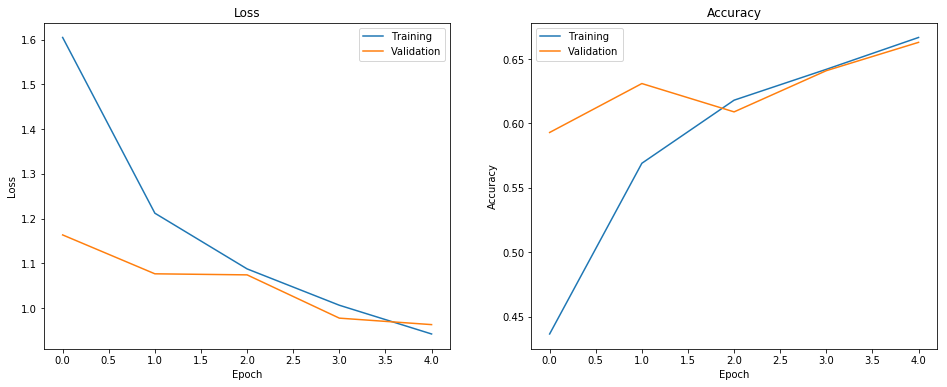

In [11]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')

- **(g)** Explain what do you see in these figures. Does it makes sense?

**<font color='purple'>Answer to (g):</font>**  I see in these figures that the loss is dropping and accuracy is growing while epoch is increasing. Yes, it makes sense that in order to rise accuracy of result, loss should dropped while epoch is increasing.

Next we will evaluate our trained network on the test and training data.

In [12]:
# IPython notebook just prints out the returned values - loss and accuracy
model.evaluate(X_test_norm, y_test)

10000/10000 [==============================] - 27s 3ms/step


[0.9688016050338745, 0.6577]

In [13]:
# the same for training set
model.evaluate(X_train_norm, y_train)

25000/25000 [==============================] - 67s 3ms/step


[0.6983760680770874, 0.76824]

- **(h)** Based on the training and test accuracy, is the trained network good?

**<font color='purple'>Answer to (h):</font>** Based on the training and test accuracy, the trained network is not good because loss is expanded and accuracy is dropped in test than training.

- **(i)** Which class is predicted for the first image in this test set? Is it correctly classified? 

**<font color='purple'>Answer to (i):</font>** Third class is predicted for the first image in this test set. It is not correctly classified on the basis of prediction.

In [14]:
print(np.argmax(model.predict(X_test_norm)[0]))
print(y_test[0])

3
[3]


### Finding similar images

The simplest way to measure the similarity between images would be to use euclidean distance. 

- **(j)** Calculate the euclidean distance between all test images. Show 10 closest images for 10 randomly selected image by filling the caps in the code below. What do you observe?

In [15]:
# we have to flatten the images to calculate the distances
X_test_flat = np.reshape(X_test, (X_test.shape[0], -1))
X_test_flat.shape

(10000, 3072)

In [16]:
from sklearn.metrics.pairwise import euclidean_distances
dists = euclidean_distances(X_test_flat, X_test_flat)

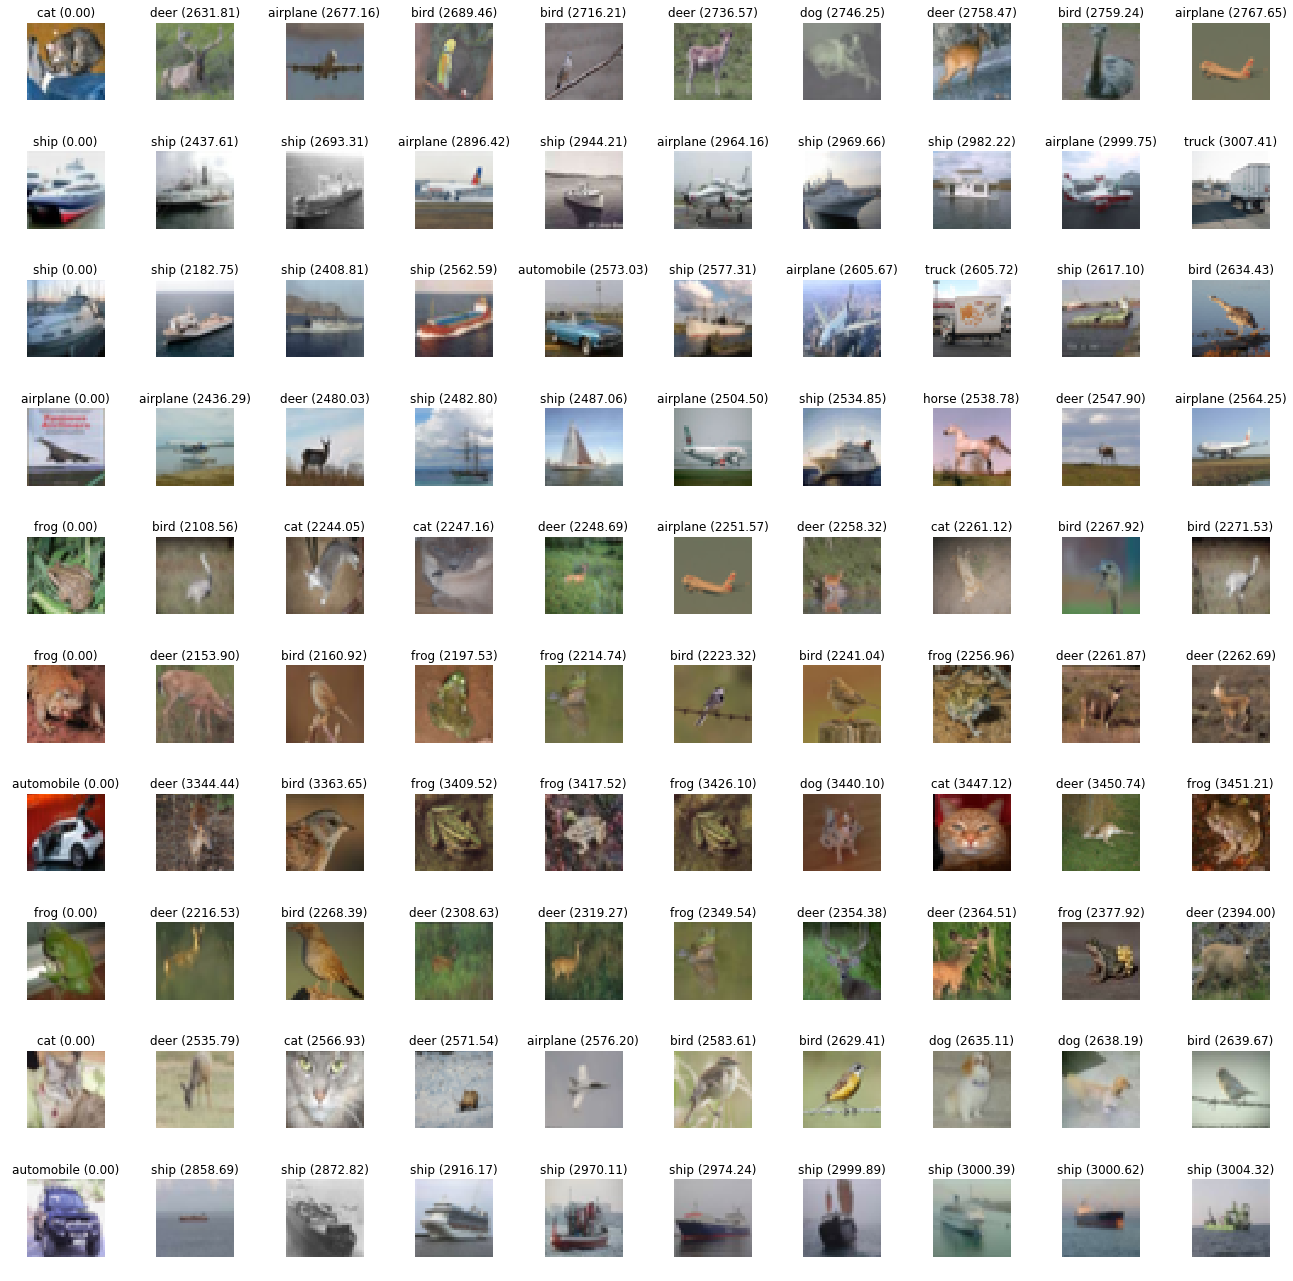

In [17]:
plt.figure(figsize=(18,18))
for i in range(10):
    closest = np.argsort(dists[i])[:10]
    for k, j in enumerate(closest):
        plt.subplot(10, 10, i*10 + k + 1)
        plt.imshow(X_test[j])
        c = class_names[y_test[j][0]]
        plt.axis('off')
        plt.title("%s (%0.2f)" % (c,dists[i, j]))
plt.tight_layout()

**<font color='purple'>Answer to (j):</font>** I observe that when training data is similar, Photos with less distance allow more accuracy.

**Feature extraction:** Model trained for classification can be used in other creative ways, for example finding similar images. The hidden layer activations can be thought of as features extracted from the images. As the final goal is to classifiy images into categories, we can assume that in the last layers the features of semantically similar images are similar. That means they are close to each other according to euclidean distance.

We choose to use `Dense(100)` layer features - it is positioned late in the network (close to output), meaning the features should reflect the semantic meaning relatively well.

We create a new model that outputs not the classification, but the `Dense(100)` layer features. We can now use `predict()` to produce features of the entire test set.

Notice we are using the activation value before dropout and before relu activation function.

In [18]:
# outputs are the features from Dense(100) layer of the previously trained model
# because we do not redefine the layers, weights remain the same
extract_model = Model(inputs=x, outputs=h3)
features = extract_model.predict(X_test_norm)
features.shape

(10000, 100)

- **(k)** Calculate euclidean distance matrix between these features and plot the closest images. Describe the results. Compare the results with the results from part **(j)**, what are the differences and why? 

In [19]:
dists = euclidean_distances(features,features)

G:\Anaconda\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


The following code produces plots to see the closest images based on the extracted features.

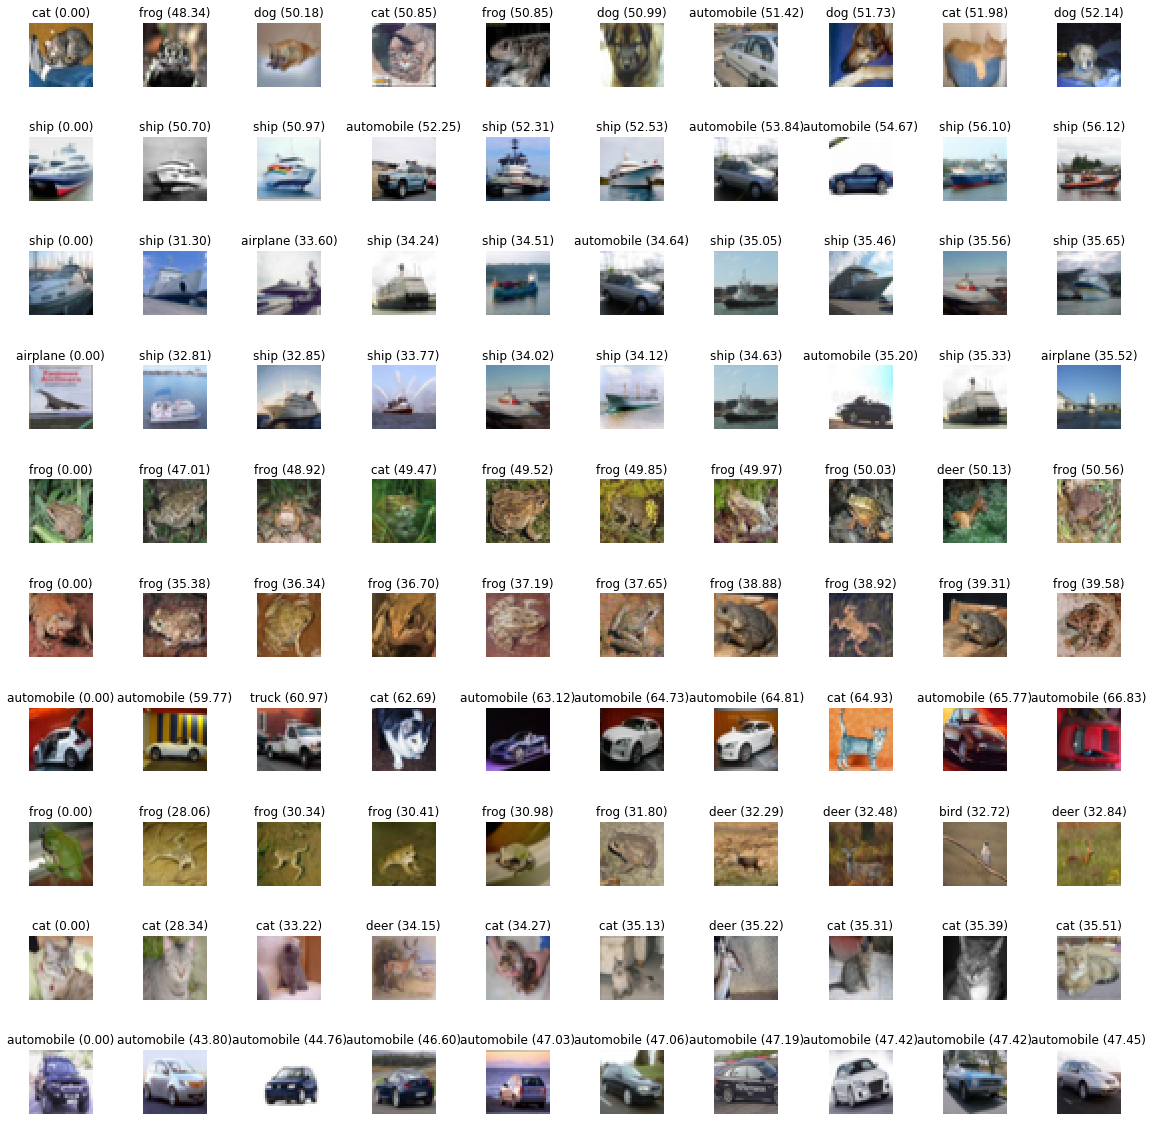

In [20]:
plt.figure(figsize=(16,16))
for i in range(10):
    closest = np.argsort(dists[i])[:10]
    for k, j in enumerate(closest):
        plt.subplot(10, 10, i*10 + k + 1)
        plt.imshow(X_test[j])
        c = class_names[y_test[j][0]]
        plt.axis('off')
        plt.title("%s (%0.2f)" % (c,dists[i, j]))
plt.tight_layout()

**<font color='purple'>Answer to (k):</font>** 
After calculating euclidean distance matrix between these features, it is observed that distance is calculated among the same classes and it is also observed the mixing is also affecting the result. Using model with learned features we find the images with less distane among them. In order to compare the results with the results from part (j), the differences is the distances have been reduced because of similar background.

 ## Task 2. Ensemble methods (3 points)

The goal of this homework is to get acquainted with some ensemble methods like bagging, boosting and random forests. For this we use the MNIST dataset about handwritten digits. In order to make the implementation easier we have stripped it down to only 2 digits: 2 and 3. The datasets for training and testing are in the files train.csv and test.csv. Both files have the same structure, with the first column indicating the class and all other columns are features providing the greyscale colour of pixels with values in the range 0..1.

In [21]:
import pandas as pd
import numpy as np
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
%matplotlib inline

In [22]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [23]:
train.shape, test.shape

((387, 785), (2021, 785))

In [24]:
train.head()

y  V2  V3  V4  V5  V6  V7  V8  V9  V10  ...   V776  V777  V778  V779  V780  \
0 -1   0   0   0   0   0   0   0   0    0  ...      0     0     0     0     0   
1  1   0   0   0   0   0   0   0   0    0  ...      0     0     0     0     0   
2  1   0   0   0   0   0   0   0   0    0  ...      0     0     0     0     0   
3  1   0   0   0   0   0   0   0   0    0  ...      0     0     0     0     0   
4 -1   0   0   0   0   0   0   0   0    0  ...      0     0     0     0     0   

   V781  V782  V783  V784  V785  
0     0     0     0     0     0  
1     0     0     0     0     0  
2     0     0     0     0     0  
3     0     0     0     0     0  
4     0     0     0     0     0  

[5 rows x 785 columns]

In [25]:
train.y.value_counts(), test.y.value_counts()

(-1    197
  1    190
 Name: y, dtype: int64,  1    1031
 -1     990
 Name: y, dtype: int64)

We have also provided the code for plotting these images that we are trying to classify.

In [26]:
def draw_img(data, index):
    pixels = data.iloc[index][1:]
    pixels = pixels.values.reshape((28, 28))
    plt.title('Label is {label}'.format(label="3" if data.iloc[index][0] == 1 else "2"))
    plt.imshow(pixels, cmap='gray')
    plt.show()

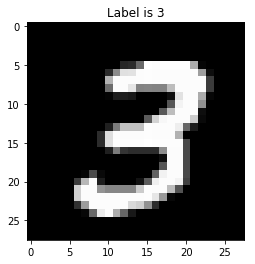

In [27]:
draw_img(train, 1)

<div class="bg-danger">In all of the following exercises use **random_state 0** when using sklearn methods.</div>
<br>
<div class="bg-danger">Use **sklearn DecisionTreeClassifier** in all of the exercises above. No need to implement this yourself.</div>

### Subtask 1: Bagging (1 point)

Bagging is a method where an ensemble of classifiers is trained on bootstrap samples of training data. To generate a bootstrap sample of a dataset with n rows one has to sample with replacement n rows from training data. The ensemble prediction is obtained by getting the predictions from each individual model and predicting the result with the most ”votes”.

- **(a)** Using sklearn.BaggingClassifier class train a bagging classifier on training data using 50 bootstrap samples (leave all other parameters at their default values). Measure and report the misclassification rate of the ensemble both on train and test data. Study the documentation and report what learning algorithm is being used to learn the individual models.

In [28]:
train_y = train.y
train_x = train.drop(columns = 'y', axis = 1)
test_y = test.y
test_x = test.drop(columns = 'y', axis = 1)
train_y.shape, train_x.shape
bagging = BaggingClassifier(n_estimators= 50,random_state = 0).fit(train_x,train_y)
print(bagging.score(train_x,train_y))
print(bagging.score(test_x,test_y))

1.0
0.9485403265710044


**<font color='purple'>Misclassification rate on train data:</font>** 0

**<font color='purple'>Misclassification rate on test data:</font>** 0.0514596734289956

**<font color='purple'>Learning algorithm for individual models:</font>** Decision Tree

- **(b)** Solve the same task as in Exercise 1 but implement bagging yourself, training the base classifier with DecisionTreeClassifier. Measure and report its misclassification rate on train and test data.

In [29]:
class BagDT:
    
    def __init__(self, ...):
        # TODO
        
    def fit(self, ...):
        # TODO
            
    def predict(self, ...):
        # TODO

SyntaxError: invalid syntax (<ipython-input-29-b12503ef47c2>, line 3)

**<font color='purple'>Misclassification rate on train data:</font>**

**<font color='purple'>Misclassification rate on test data:</font>**

- **(c)** Draw a figure that shows the change in misclassification rate of bagging classifier as we increase the size of the ensemble. (x-axis: number of individual models 1-50; y-axis: misclassification rate; one line for testing, one for training error rate). Discuss how the results change with the number of models in the ensemble? Discuss what would happen with the errors when the number of models is very big (e.g 5000)?

In [ ]:
# TODO

**<font color='purple'>Answers:</font>**

### Subtask 2: Random Forest (1 point)

The ensemble can often be improved, if we decrease the correlation between the models within the ensemble. One way to do it is to use the random forest algorithm instead of bagged decision trees, and by this perform sampling on features as well, not only on instances.

- **(a)** Train a random forest classifier using sklearn.RandomForestClassifier, using 50 trees and sampling 50 features as candidates for each split decision. Measure and report its misclassification rate on train and test data.

In [ ]:
Random = RandomForestClassifier(n_estimators= 50,min_samples_split = 50,random_state = 0).fit(train_x,train_y)
print(Random.score(train_x,train_y))
print(Random.score(test_x,test_y))

**<font color='purple'>Misclassification rate on train data:</font>** 0.0258397932816538

**<font color='purple'>Misclassification rate on test data:</font>** 0.045522018802573

- **(b)** Implement a simpler version of the random forest type classifier, where instead of sampling features in each decision node, the features are sampled before applying the decision tree learner. That is, each individual tree is constructed on a dataset obtained by sampling $f$ features (without replacement) and bootstrap-sampling $n$ instances (with replacement), where $f$ is a parameter specified by the user (who will be yourself in the next subtask). Measure and report the misclassification rate on train and test data using 50 trees with $f=50$ and compare to the random forest from the previous exercise.

**<font color='purple'>Misclassification rate on train data:</font>**

**<font color='purple'>Misclassification rate on test data:</font>**

**<font color='purple'>Comparison to random forest:</font>**

In [ ]:
class SimplifiedRandomForest:
    
    def __init__(self, ...):
        # TODO
        
    def fit(self, ...):
        # TODO
            
    def predict(self, ...):
        # TODO

- **(c)** Try values $f=10$, $f=50$ and $f=300$ and draw a similar figure as in Subtask 1 (c) for each of these three cases. What happens with the error rates if we increase the number of used features? Why?

**<font color='purple'>Answers:</font>**

### Subtask 3: Boosting (1 point)

In bagging each model is built independently of all others, this is also referred to as a parallel construction. In boosting each next model is built using the information from how the previous models performed, also referred to as a sequential construction. In each iteration of boosting the training dataset is re-weighted so that the next model learned by the weak learner would concentrate efforts on the points that were misclassified earlier.

- **(a)** Train Adaboost classifier on the same dataset doing 50 steps using sklearn.AdaBoostClassifier. Measure and report its misclassification rate on train and test data.

In [ ]:
AdaBoost = AdaBoostClassifier(n_estimators= 50,random_state = 0).fit(train_x,train_y)
print(AdaBoost.score(train_x,train_y))
print(AdaBoost.score(test_x,test_y))

**<font color='purple'>Misclassification rate on train data:</font>** 0

**<font color='purple'>Misclassification rate on test data:</font>** 0.053438891637803

- **(b)** Implement Adaboost yourself using DecisionTreeClassifier as the base learner with $\textrm{max_depth} = 2$. The instance weights can be specified using the sample_weights parameters when fitting the decision tree. Iterate 50 steps and measure its misclassification rate on train and test data. Compare to the result of the previous subtask (3a).

In [ ]:
class AdaBoost:
    
    def __init__(self, ...):
        # TODO
        
    def fit(self, ...):
        # TODO
            
    def predict(self, ...):
        # TODO

**<font color='purple'>Misclassification rate on train data:</font>**

**<font color='purple'>Misclassification rate on test data:</font>**

**<font color='purple'>Comparison to subtask (3a):</font>**

 ## How long did it take you to solve the homework?

Please answer as precisely as you can. It does not affect your points or grade in any way. It is okey, if it took 30 minutes or 24 hours. The results are used to improve the homeworks next year.

**<font color='red'>Task 1:</font>** 4 hours

**<font color='red'>Task 2:</font>** 6 hours

**<font color='red'>In total (without bonus task):</font>**

<font color='red'>Please use <b>"Kernel->Restart and Run All"</b> command in Jupyter Notebook before submitting the homework and check your results. This ensures that we would be able to replicate your results while grading.</font>

## Bonus Task. Neural network capacity (up to 3 bonus points)

In the lecture we have introduced a simple regression task, where the actual relationship is $y=x^2$. We generated 1000 training and 1000 test instances in the range [-1,+1] and solved the task using a multi-layer perceptron with 2 hidden layers using logistic sigmoid activation and output neuron using linear activation. This bonus exercise is about investigating the role of the network architecture, and the role of optimisation method for solving this regression task. Perform experiments, report and discuss their results. Feel free to use the code from the notebook that we provided after the practice session <LINK>. Note that you can consider reducing the training set size to make computations faster. When evaluating a particular architecture, calculate the loss on test data, but also plot the function that the regression model has learned.  Here are some questions to guide you:
* Can 1 hidden layer be enough? If yes, then how wide should that layer be (how many neurons)? 
* Does it matter what activation function is used (relu, tanh, sigmoid, linear)? 
* Does it matter what optimisation method is being used (SGD, RMSprop, Adam)? 
* In case of SGD, what learning rate values are good or bad? 
* Are the answers different if you use non-linear activation in the output neuron? 
* When using 2 hidden layers, how many neurons should these layers minimally have? 
* Is there any benefit in using more than 2 hidden layers? 
* Out of all successful network architectures that you tried, which had the minimal number of weights (the one in the lecture has 13)? 
* Which successful architecture had the fastest training time? 
* Are the results different if you use training and test data from the range [-10,+10] instead?

Note that you probably cannot answer all the combinations of all questions (number of layers, number of neurons in layers, activation function in each layer, optimisation method, learning rate, loss, speed) in full detail in reasonable time. However, in order to qualify for 2 bonus points we expect you to touch on all questions to some extent (no partial points given if touching some of the questions but not others). We expect you to provide enough explanation so that it is easy to follow your discussion of results. One (or potentially multiple) best solutions will be awarded 1 extra bonus point (thus getting 3 bonus points in total).

If you find it easier to provide the solution to the bonus task as a separate notebook, then feel free to do so. Given that you might choose to do a lot of computation, feel free to run it outside of notebooks and store the results into file(s). Your  bonus task solution notebook would then only need to read in the results and draw conclusions from them. If you have run any code outside of this current notebook then please submit everything together as a compressed file.


1. Yes, 1 hidden layer can be enough, Its difficult to judge that how wide should that layer be because it goes exponentially and ideally neurons in hidden layers should be equal to neurons in input layer.
2. It matter what activation function is used but depends on problem.(tanh and sigmoid:classification between two classes, ReLU: The most used activation function in the world and linear can not classified always)
3. Yes, It matter what optimisation method is being used but depends on problem. SGD and Adam are better then RMSprop because it takes more convergence time.(SGD: optimizing a differentiable objective function, RMSprop: unpublished optimization algorithm, Adam: Extension of SGD)
4. In case of SGD, Lower learning rate values are good because as the slower we travel it will more efficient.
5. No, the answers are not different if we use non-linear activation in the output neuron.
6. When using 2 hidden layers, neurons in hidden layers should be equal to neurons in input layer so for 2 hidden layers neurons can be minimally twice.
7. Yes, there is benefits in using more than 2 hidden layers. Ideal number of hidden layers is "2-10" in neurons networks. Increasing the number of hidden layers will allow to decrease training error.
8. Out of all successful network architectures that I tried, SGD had the minimal number of weights.
9. SGD architecture had the successful fastest training time.
10. No, The results are not different if you use training and test data from the range [-10,+10] instead because labelled instances are uniformly randomly drawn and it will be same.

 ### How long did it take you to solve the bonus task?

**<font color='red'>Answer:</font>**

3 hours